<a href="https://colab.research.google.com/github/My-academic-Projects-and-Labs/GAN-for-MNIST/blob/main/Part_2_Lecture_03_Pytorch_CNN_In_Class_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

import torch.nn as nn

from torch import optim
from torch.autograd import Variable

In [ ]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
MNIST_path='/content/gdrive/My Drive/UoM - CSE - Teaching/MSc/CS5621 - Machine Learning/In21 (2021)/Data Sets'

train_data=datasets.MNIST(
    root=MNIST_path,
    train=True,
    transform=ToTensor(),
    download=True,
)


test_data=datasets.MNIST(
    root=MNIST_path,
    train=False,
    transform=ToTensor()
)


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
print(train_data.data.size())

torch.Size([60000, 28, 28])


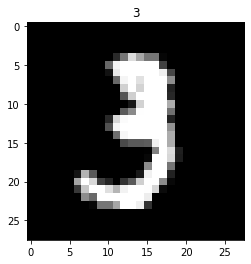

In [ ]:
plt.imshow(train_data.data[10], cmap='gray')
plt.title('%i' % train_data.targets[10])
plt.show()

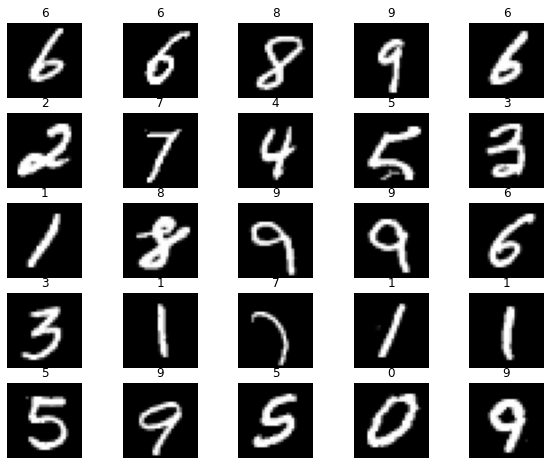

In [ ]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_data), size=(1,)).item()
    img, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
from torch.utils.data import DataLoader
loaders = {
    'train' : torch.utils.data.DataLoader(train_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),

    'test'  : torch.utils.data.DataLoader(test_data,
                                          batch_size=100,
                                          shuffle=True,
                                          num_workers=1),
}
loaders

{'test': <torch.utils.data.dataloader.DataLoader at 0x7f0864fb4a50>,
 'train': <torch.utils.data.dataloader.DataLoader at 0x7f0864fb4c90>}

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=36,  #16
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(36, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)


    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)
        output = self.out(x)
        return output, x    # return x for visualization



In [ ]:
cnn=CNN()
print(cnn)

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 36, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(36, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)


In [ ]:
loss_func = nn.CrossEntropyLoss()
loss_func

CrossEntropyLoss()

In [ ]:
optimizer = optim.Adam(cnn.parameters(), lr=0.01)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.01
    weight_decay: 0
)

In [ ]:
num_epochs = 10

#Remember to run on GPU

def train(num_epochs, cnn, loaders):

    cnn.train()

    # Train the model
    total_step = len(loaders['train'])

    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(loaders['train']):

            # gives batch data, normalize x when iterate train_loader
            b_x = Variable(images)   # batch x
            b_y = Variable(labels)   # batch y
            output = cnn(b_x)[0]
            loss = loss_func(output, b_y)

            # clear gradients for this training step
            optimizer.zero_grad()

            # backpropagation, compute gradients
            loss.backward()
            # apply gradients
            optimizer.step()

            if (i+1) % 100 == 0:
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(epoch + 1, num_epochs, i + 1, total_step, loss.item()))
                pass
        pass
    pass

train(num_epochs, cnn, loaders)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch [1/10], Step [100/600], Loss: 0.3861
Epoch [1/10], Step [200/600], Loss: 0.2452
Epoch [1/10], Step [300/600], Loss: 0.1591
Epoch [1/10], Step [400/600], Loss: 0.0942
Epoch [1/10], Step [500/600], Loss: 0.2076
Epoch [1/10], Step [600/600], Loss: 0.1144
Epoch [2/10], Step [100/600], Loss: 0.1071
Epoch [2/10], Step [200/600], Loss: 0.0714
Epoch [2/10], Step [300/600], Loss: 0.0810
Epoch [2/10], Step [400/600], Loss: 0.2407
Epoch [2/10], Step [500/600], Loss: 0.0914
Epoch [2/10], Step [600/600], Loss: 0.1838
Epoch [3/10], Step [100/600], Loss: 0.1812
Epoch [3/10], Step [200/600], Loss: 0.1902
Epoch [3/10], Step [300/600], Loss: 0.0178
Epoch [3/10], Step [400/600], Loss: 0.0972
Epoch [3/10], Step [500/600], Loss: 0.0663
Epoch [3/10], Step [600/600], Loss: 0.1682
Epoch [4/10], Step [100/600], Loss: 0.0482
Epoch [4/10], Step [200/600], Loss: 0.0988
Epoch [4/10], Step [300/600], Loss: 0.0853
Epoch [4/10], Step [400/600], Loss: 0.0971
Epoch [4/10], Step [500/600], Loss: 0.3524
Epoch [4/10

In [ ]:
def test():
  cnn.eval()
  with torch.no_grad():
    correct=0
    total=0
    for images, labels in loaders['test']:
      test_output,last_layer=cnn(images)
      pred_y=torch.max(test_output,1)[1].data.squeeze()
      accuracy=(pred_y==labels).sum().item()/float(labels.size(0))
      pass
    print('Test Acc %.2f' % accuracy)
    pass


test()

Test Acc 0.99


In [ ]:
sample = next(iter(loaders['test']))
imgs, lbls = sample
actual_number = lbls[:100].numpy()

In [ ]:
test_output,last_layer=cnn(imgs[:100])
pred_y=torch.max(test_output,1)[1].data.numpy().squeeze()

print(f'Prediction number {pred_y}')
print(f'Actual number {actual_number}')

Prediction number [6 1 9 4 8 3 0 2 5 7 6 5 4 8 0 4 3 1 2 6 9 6 3 3 6 0 9 5 3 7 3 6 8 5 8 0 9
 0 1 3 8 4 7 1 3 5 7 6 2 7 8 1 9 3 6 8 4 7 6 5 8 3 2 0 7 7 6 0 8 5 3 3 1 4
 9 4 2 0 2 8 5 3 0 3 3 0 0 4 6 1 2 9 9 1 5 8 8 4 9 0]
Actual number [6 1 9 4 8 3 0 2 5 7 6 5 4 8 8 4 3 1 2 6 9 6 3 2 6 0 9 5 3 7 3 6 8 5 8 0 9
 0 1 3 8 4 7 1 3 5 7 6 2 7 8 1 9 3 6 8 2 9 6 5 8 3 2 0 7 7 6 0 8 5 3 3 1 4
 9 4 2 0 2 8 5 3 0 3 3 0 0 4 6 1 2 9 9 1 5 8 8 4 9 0]


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm=confusion_matrix(actual_number, pred_y)

Confusion matrix, without normalization
[[11  0  0  0  0  0  0  0  0  0]
 [ 0  8  0  0  0  0  0  0  0  0]
 [ 0  0  7  1  1  0  0  0  0  0]
 [ 0  0  0 14  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0]
 [ 0  0  0  0  0  9  0  0  0  0]
 [ 0  0  0  0  0  0 11  0  0  0]
 [ 0  0  0  0  0  0  0  7  0  0]
 [ 1  0  0  0  0  0  0  0 12  0]
 [ 0  0  0  0  0  0  0  1  0  9]]


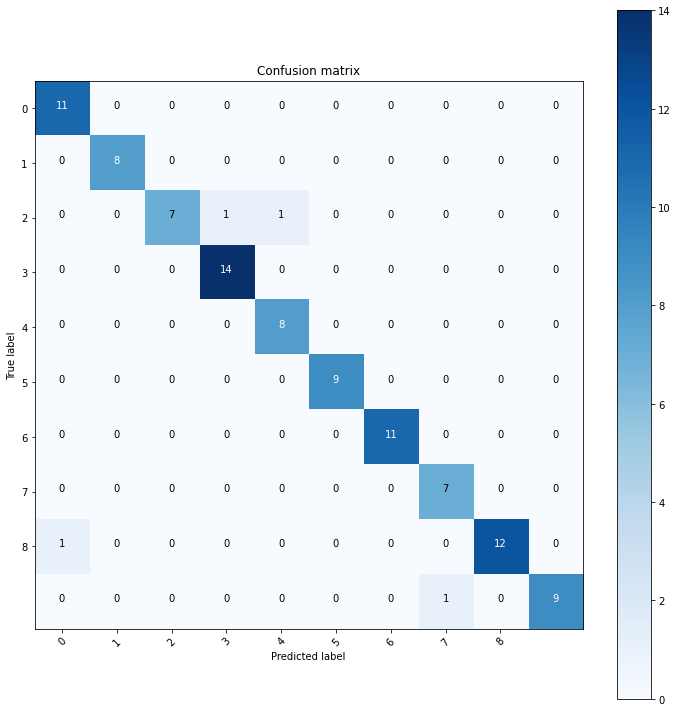

In [ ]:
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm, [str(i) for i in range(0,9)])

In [ ]:
!sudo pip install graphviz
!sudo pip install torchviz

  Created wheel for torchviz: filename=torchviz-0.0.2-cp37-none-any.whl size=4152 sha256=2eb2bd1d279d30411ef417f0576f383abf17c12dd916dd83a09604c6631e8f20
  Stored in directory: /root/.cache/pip/wheels/01/26/58/026ffd533dbe8b3972eb423da9c7949beca68d1c98ed9e8624
Successfully built torchviz


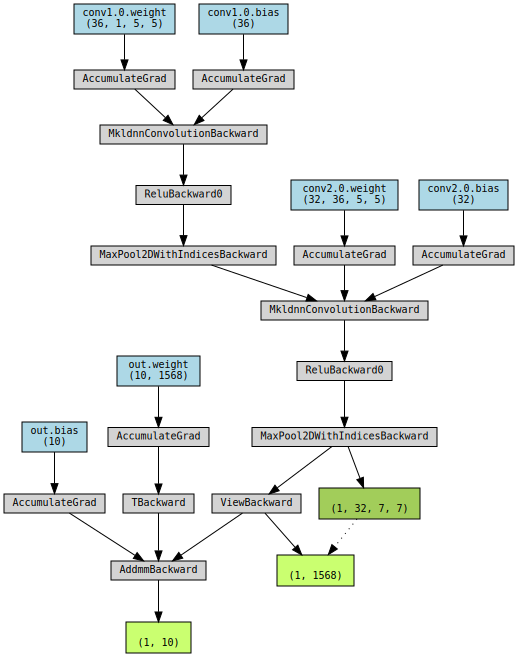

In [ ]:
from torchviz import make_dot

make_dot (cnn(imgs[:1]), params=dict(cnn.named_parameters()))